# Visualizzare i dati

Nelle due lezioni precedenti di questa week abbiamo visto come manipolare i dati numerici (con NumPy) e tabellari (con Pandas). Oltre alla manipolazione, uno degli aspetti cruciali di ogni progetto di Data Science è legato alla capacità di comunicare in maniera efficace il risultato del proprio lavoro. 

In Python esistono differenti librerie di data visualization, pensate per supportare la comunicazione in differenti forme. Tra tutte, una delle più diffuse e supportate è probabilmente Matplotlib, un toolbox di visualizzazione fortemente ispirato (come suggerito dal nome) alle funzionalità di plotting e visualizzazione disponibili in MATLAB. Questo fa si che chi conosce MATLAB non avrà nessuna difficoltà ad utilizzare Matplotlib, in quanto non solo i comandi, ma anche la sintassi, le opzioni, etc., sono quasi perfettamente identici nei due ambienti. Chi non conosce MATLAB avrà comunque vita molto facile, in quanto tutte le funzionalità sono basate su comandi molto mnemonici ed intuitivi. 

Da un punto di vista tecnico, Matplotlib è un tool di visualizzazione pensato per interagire (quasi direttamente) con le primitive messe a disposizione dalla libreria grafica. Se, da un lato, questo ne rende l'uso a tratti "frustrante" (in quanto bisogna indicare esplicitamente ogni singolo dettaglio grafico che si vuole utilizzare, tramite opzioni che ricordano molto il modus operandi da linea di comando), dall'altro rende Matplotlib estremamente potente e versatile. Difatti, non solo l'utente ha una grande libertà e varietà di opzioni disponbili, ma i risultati tendono ad essere estremamente coerenti al variare dell'ambiente (come ad esempio il sistema operativo) su cui viene eseguito. Questo ultimo aspetto si rivela particolarmente utile quando si ha necessità di condividere i risultati ottenuti tra differenti utenti. 

Matplotlib non ha particolari pre-requisiti per funzionare. Tutti i laboratori presenti nel corso avranno già una versione di Matplotlib installata. In questa lezione vedremo i concetti e i comandi fondamentali per il suo utilizzo. La guida ufficiale completa è reperibile sul [sito ufficiale](https://matplotlib.org/). Si noti inoltre che le funzionalità e la sintassi dei comandi possono variare tra le varie release. Questo documento fa riferimento alla versione `3.2.1`.

# Utilizzare Matplotlib

Come tutte le librerie Python, per poter utilizzare Matplotlib è necessario prima importare la libreria tramite il comando `import`

In [1]:
import matplotlib as mpl          #esistono vari alias usati per matplotlib. Uno dei più usati è mpl 
import matplotlib.pyplot as plt 

mpl.__version__                   #visualizzazione della versione di matplotlib utilizzata

'3.2.1'

Rispetto a quanto visto nelle due lezioni precendenti, questa volta abbiamo due `import` con alias:

*   Il primo è il classico import che serve per dichiarare la nostra volontà di voler utilizzare Matplotlib
*   Il secondo definisce un alias per `pyplot`, che rappresenta l'interfaccia di riferimento che useremo in tutto il corso per la visualizzazione

Difatti, le principali funzioni per la visualizzazione (come `plot`, `hist`, etc.) sono contenute proprio in questo modulo. Dunque, onde evitare di scrivere ogni volta la forma estesa (es. `pyplot.plot(...)`), si preferisce importare pyplot e usare un alias, per comodità e facilità di lettura.

## Visualizzazione 2D

Con visualizzazione bidimensionale (o 2D) ci si riferisce all'insieme dei grafici che presentano i dati su due assi. Come vedremo nei prossimi esempi, questo non limita nè la tipologia, nè la quantità di dati visualizzabili.

### Le funzioni `plot()` e `show()`

Ipotizziamo di avere due variabili, `X` e `Y`, e di voler mostrare come la seconda vari al variare della prima

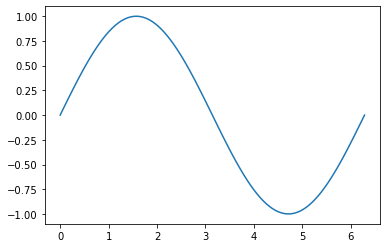

In [2]:
import numpy as np

X = np.linspace(0, 2*np.pi, 100)
Y = np.sin(X)
plt.plot(X, Y)

Con la funzione `plot()` abbiamo velocemente ottenuto il grafico della variabile dipendente `Y` al variare della variabile indipendente `X`. Come anticipato, la sintassi è identica a quella prevista per il comando plot di MATLAB. 

Quando si mostra un grafico è buona pratica aggiungere informazioni che ne aiutino l'interpretazione, come ad esempio un titolo o una descrizione degli assi. Anche in questo caso, è possibile utilizzare comandi che ricordano molto da vicino gli equivalenti in MATLAB.

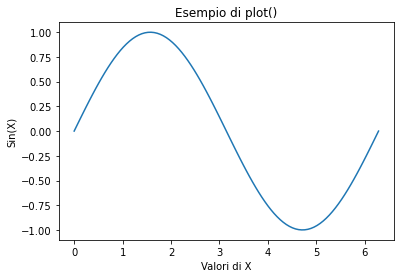

In [3]:
X = np.linspace(0, 2*np.pi, 100)
Y = np.sin(X)
plt.plot(X, Y)

plt.xlabel("Valori di X")              #Descrizione per l'asse delle ordinate
plt.ylabel("Sin(X)")                   #Descrizione per l'asse delle ascisse       
plt.title("Esempio di plot()")         #Titolo per la figura                          
plt.show()

Esistono molti altri comandi per modificare ulteriormente il risultato finale della rappresentazione (ad esempio per cambiare l'intervallo di visualizzazione).

Una funzione che forse avrai notato è `show().` Si tratta di un metodo messo a disposizione da Matplotlib per scatenare l'effettiva visualizzazione dei dati da parte delle primitive di visualizzazione messe a disposizione dal sistema nel quale il codice è eseguito. Proprio a causa di questo forte legame con le primitive di visualizzazione, è, in genere, fortemente sconsigliato richiamare più di una volta `show()` all'interno dello stesso script\cella.

In [4]:
#TASK: Come mai abbiamo dovuto ripetere le righe di codice associate alla creazione del plot? 
#Che succede se eseguiamo solo quelle da xlabel in giù?



Matplotlib fornisce anche molte funzionalità per modificare l'aspetto dei grafici ottenuti. Ad esempio, ipotizzando di voler visualizzare l'andamento del seno e del coseno sullo stesso grafico, utilizzando colori diversi per le due curve

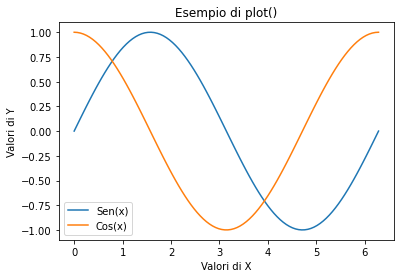

In [5]:
X = np.linspace(0, 2*np.pi, 100)
Ysin = np.sin(X)
Ycos = np.cos(X)
plt.plot(X, Ysin)
plt.plot(X, Ycos)

plt.xlabel("Valori di X")              
plt.ylabel("Valori di Y")                    
plt.title("Esempio di plot()")
plt.legend(['Sen(x)', 'Cos(x)'])                                  
plt.show()

Come si evince dal codice, è bastato semplicemente richiamare più volte la funzione `plot()` per mostrare automaticamente le due curve, con colori diversi, sullo stesso grafo. In questo caso specifico, non avendo noi indicato preferenze sui colori o sullo stile di linea da disegnare, Matplotlib ha autonomamente scelto per noi. È tuttavia esplicitamente possibile indicare anche queste informazioni.

Un nuovo comando introdotto è `legend(...)`, utilizzato per mostrare una legenda che aiuti il lettore a capire a cosa si riferisce ognuna delle linee visualizzate (dato che questa volta non possiamo usare direttamente l'attributo `ylabel` per questo scopo).

### Scatter, Bar e altri tipi di grafici

La funzione plot è destinata a disegnare curve (nel senso più ampio del termine). Tuttavia, soprattutto nella Data Science, spesso c'è la necessità di visualizzare informazioni "discrete", ossia associate ad un numero di valori finiti e predeterminati. Suppponiamo di avere due coppie di vettori contenenti l'età e il numero di persone con quell'età, divisi per maschi e femmine. Vediamo i differenti modi per visualizzare queste informazioni

In [6]:
#Vettori di dati
etaM = [25, 28, 29, 30, 31, 35, 36]
numM = [5, 2, 8, 3, 9, 1, 2]

etaF = [26, 27, 28, 29, 32, 33, 34]
numF = [2, 3, 5, 1, 9, 2, 1]

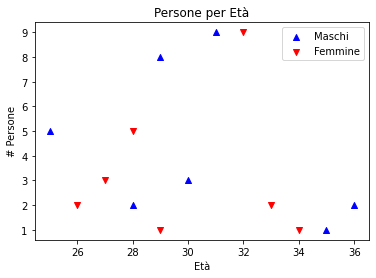

In [7]:
#Scatter plot
plt.scatter(etaM, numM, marker='^', label="Maschi", color='b')
plt.scatter(etaF, numF, marker='v', label="Femmine", color='r')

plt.xlabel("Età")
plt.ylabel("# Persone")
plt.title("Persone per Età")
plt.legend()
plt.show()

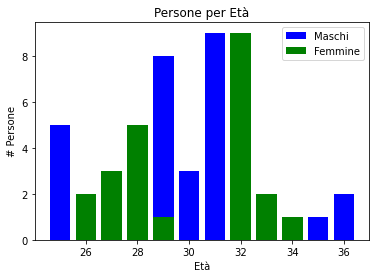

In [8]:
#Bar plot
plt.bar(etaM, numM, label="Maschi", color='b')
plt.bar(etaF, numF, label="Femmine", color='g')

plt.xlabel("Età")
plt.ylabel("# Persone")
plt.title("Persone per Età")
plt.legend()
plt.show()

In [9]:
#TASK: Cosa succede se invertiamo le due chiamate al metodo plt.bar(...)? Perchè?


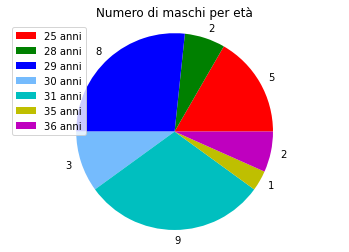

In [10]:
#Grafico a torta (pie chart)

gruppi = [str(i) + ' anni' for i in etaM]                 #Convertiamo i numeri in stringhe
persone = [str(i) for i in numM]
colori = ['r', 'g', 'b', 'xkcd:sky blue', 'c', 'y', 'm']  #Colori per la visualizzazione

plt.pie(numM, labels=persone, colors=colori)

plt.axis('equal')
plt.title('Numero di maschi per età')
plt.legend(gruppi)
plt.show()

Ognuno dei grafici mostrati è utile in alcune occasioni e meno utile in altre. Ad esempio, lo scatter plot ben si presta alle visualizzazioni di grandezze puntuali, mentre il barplot è più utile quando anche l'ampiezza del conteggio è importante (soprattutto se comparata tra differenti casi, come nell'esempio). Infine, il grafico a torta (riportato nell'esempio solo per i maschi) è adatto quando si vuole evidenziare la porzione di ogni contributo, rispetto al totale. 

Si noti che quelli riportati sono solo esempi. Matplotlib prevede una moltitudine di grafici e opzioni (alcune delle quali sono riportate negli esempi), al fine di soddisfare le più svariate esigenze di visualizzazione.

## Visualizzazione multipla

In alcuni casi, è necessario mostrare contemporaneamente più aspetti relativi ad una stesso problema. L'approccio più semplice è utilizzare più figure, ma per questioni di organizzazione e di chiarezza di esposizione, alcune volte può tornare utile mostrare differenti grafici nella stessa figura.

Riprendiamo l'esempio del grafico a torta e modifichiamolo al fine di mostrare due grafi separati, uno per i maschi ed uno per le femmine. A tal scopo, facciamo affidamento alla funzione `subplot`

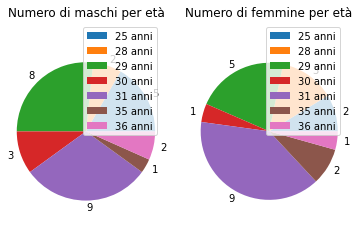

In [11]:
gruppiM = [str(i) + ' anni' for i in etaM]  
personeM = [str(i) for i in numM]              
gruppiF = [str(i) + ' anni' for i in etaF]    
personeF = [str(i) for i in numF]            

plt.figure()            #creazione della figure

#Stiamo creando una figura con due sottofigure (subplot), organizzate su una riga e due colonne, 
#e stiamo accedendo al primo elemento di questa struttura
plt.subplot(1, 2, 1)    #Righe, Colonne, Sottofigura attuale
plt.pie(numM, labels=personeM)
plt.axis('equal')
plt.title('Numero di maschi per età')
plt.legend(gruppi)

#Stiamo creando una figura con due sottofigure (subplot), organizzate su una righe e due colonne, 
#e stiamo accedendo al secondo elemento di questa struttura
plt.subplot(1, 2, 2)
plt.pie(numF, labels=personeF)
plt.axis('equal')
plt.title('Numero di femmine per età')
plt.legend(gruppi)

Ci sono diverse cose a cui prestare attenzione in questo esempio. La prima è che in questo caso abbiamo esplicitmente inizializzato la figura, in quanto volevamo che i due grafici coesistessero all'interno dello stesso oggetto. La seconda è che non abbiamo mai usato show(), ma abbiamo lasciato che l'interprete elaborasse autonomamente il comando. 

È interessante notare che questa modalità (praticamente identica al modus operandi presente in MATLAB) non è l'unica possibile. Un'alternativa è utilizzare i metodi `subplot2grid` o `add_subplot`. Da un punto di vista dell'utente finale, il risultato è praticamente identico, ma questa seconda modalità dà più libertà allo sviluppatore, in quanto permette una gestione esplicita degli handles dei singoli assi (cosa che nel caso di `subplot` va gestita tramite i metodi `gcf()` e `gca()`)

## Visualizzazione 3D

In maniera simile a quanto visto in precedenza, con visualizzazione tridimensionale (o 3D) ci si riferisce all'insieme dei grafici che presentano i dati su tre assi. Tale rappresentazione torna molto utile nel caso di variabili dipendenti che variano al variare contemporaneo di più variabili indipendenti. 

Al fine di poter visualizzare grafici 3D è necessario un ulteriore import da `mpl_toolkits`, il namespace contenente l'insieme dei moduli che estendono Matplotlib per funzionalità estremamente task-oriented (come appunto la visualizzazione 3D).

In [12]:
from mpl_toolkits import mplot3d

Da questo momento in poi è possibile indicare la volontà di visualizzare assi tridimensionali, utilizzando l'attributo `projection='3d'` **all'interno di uno dei metodi di creazione di assi** (e non quindi direttamente in `plot()` o `figure()`). Sebbene questa particolarità renda un po' più macchinoso il processo di creazione di un singolo grafo tridimensionale, si rivela estremamente utile nel caso di visualizzazioni multiple. 

Un esempio molto intuitivo riguarda la visualizzazione di tre proiezioni in uno spazio cartesiano

Text(0.5, 0, 'Età (anni)')

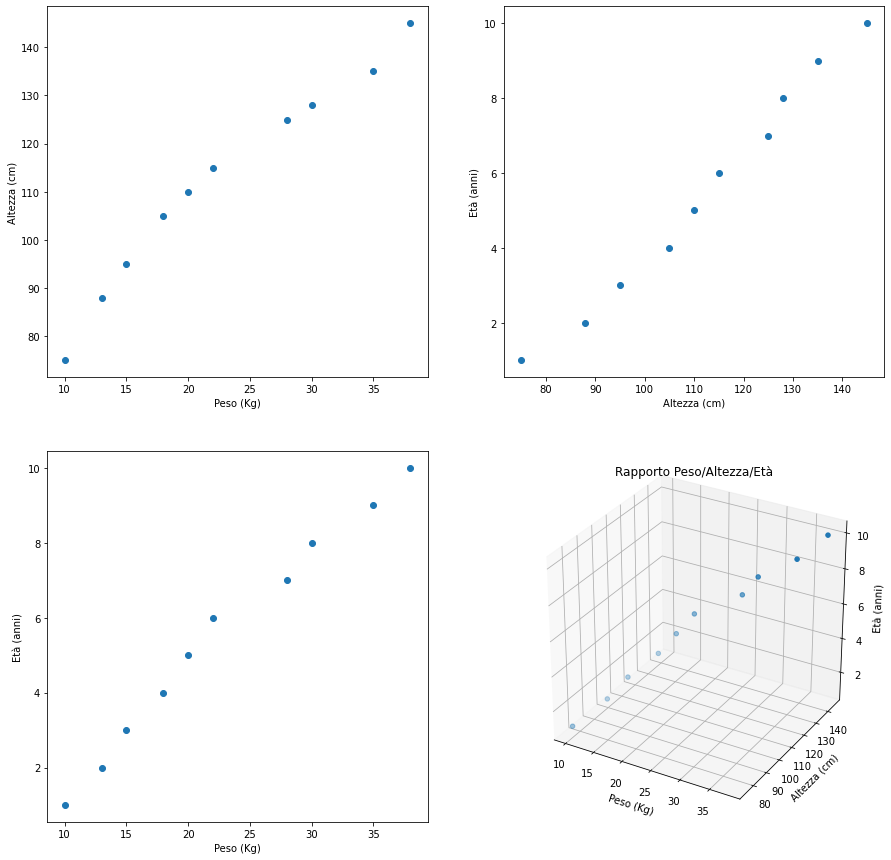

In [13]:
#Distribuzioni del peso e dell'altezza in base all'età
eta = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
peso = [10, 13, 15, 18, 20, 22, 28, 30, 35, 38]
altezza = [75, 88, 95, 105, 110, 115, 125, 128, 135, 145]

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), rowspan=1, colspan=1, projection = '3d')
plt.title("Rapporto Peso/Altezza/Età")

#Visualizzazione peso rispetto altezza
ax1.scatter(peso, altezza)
ax1.set_xlabel('Peso (Kg)')
ax1.set_ylabel('Altezza (cm)')

#Visualizzazione peso rispetto età
ax2.scatter(peso, eta)
ax2.set_xlabel('Peso (Kg)')
ax2.set_ylabel('Età (anni)')

#Visualizzazione altezza rispetto età
ax3.scatter(altezza, eta)
ax3.set_xlabel('Altezza (cm)')
ax3.set_ylabel('Età (anni)')

#Visualizzazione 3D complessiva
ax4.scatter(peso, altezza, eta)
ax4.set_xlabel('Peso (Kg)')
ax4.set_ylabel('Altezza (cm)')
ax4.set_zlabel('Età (anni)')

Si noti che praticamente tutti i grafici possono essere resi 3D con le modalità appena mostrate.

## Esportare i grafici

Abbiamo visto come realizzare diverse tipologie di grafici. Molto spesso capita però di dover condividere (magari stampandoli) i grafici ottenuti. Matplotlib fornisce una modalità molto intuitiva per esportare i grafici in diversi formati (tra cui, ad esempio, *png* e *pdf*).

Riprendiamo l'esempio iniziale ed esportiamo i grafici di seno e coseno tra $[0,2\pi]$

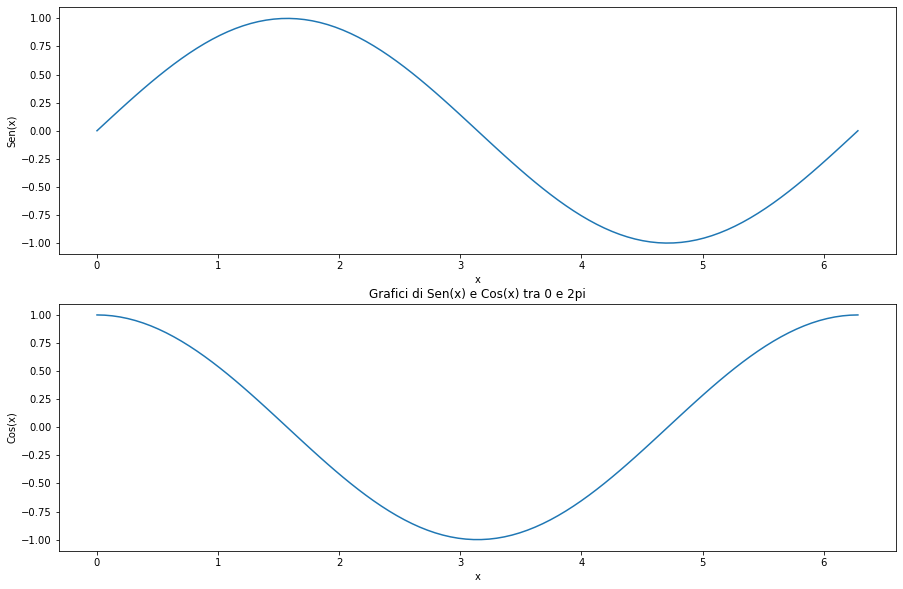

In [14]:
X = np.linspace(0, 2*np.pi, 100)
Ysin = np.sin(X)
Ycos = np.cos(X)

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)
plt.title("Grafici di Sen(x) e Cos(x) tra 0 e 2pi")

#Visualizzazione sen(x)
ax1.plot(X, Ysin)
ax1.set_xlabel('x')
ax1.set_ylabel('Sen(x)')

#Visualizzazione cos(x)
ax2.plot(X, Ycos)
ax2.set_xlabel('x')
ax2.set_ylabel('Cos(x)')

#Salvataggio
plt.savefig('sin_cos.png', dpi=300)
plt.savefig('sin_cos.pdf')

# Esercizio

A partire dal file *iris.csv* utilizzato anche nella lezione precedente, creare una figura multi-grafico (4 righe e 2 colonne) dove:

*   Il primo grafico (in alto a sinistra) presenti lo scatter plot di larghezza e lunghezza del petalo
*   Il secondo grafico (in alto a destra) presenti lo scatter plot di larghezza e lunghezza del sepalo
*   Il terzo grafico (centrale, che occupi due righe e due colonne) presenti lo scatter plot di larghezza e lunghezza del petalo, insieme alla larghezza del sepalo

In tutti e tre i plot, si usino colori e simboli diversi per ognuna delle specie di iris. 

Salvare il risultato nel file *iris.pdf*

# Soluzione dell'esercizio

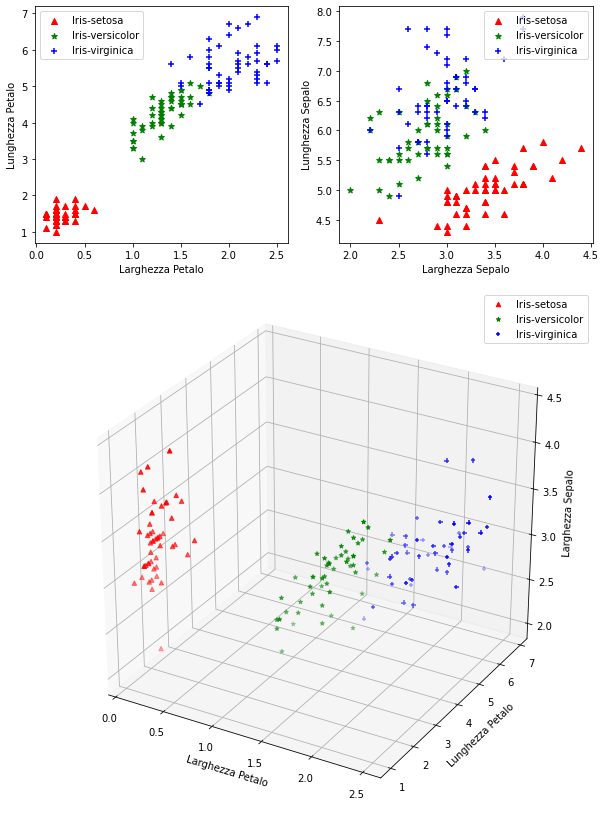

In [15]:
import pandas as pd

#Caricamento del dataset
irisDataset = pd.read_csv("iris.csv", names=['Lunghezza Sepalo', 'Larghezza Sepalo', 'Lunghezza Petalo', 'Larghezza Petalo', 'Specie'])

#Estrazione dei valori per classe
largPetSet = irisDataset.loc[irisDataset['Specie'] == 'Iris-setosa', 'Larghezza Petalo'].values
lungPetSet = irisDataset.loc[irisDataset['Specie'] == 'Iris-setosa', 'Lunghezza Petalo'].values
largSepSet = irisDataset.loc[irisDataset['Specie'] == 'Iris-setosa', 'Larghezza Sepalo'].values
lungSepSet = irisDataset.loc[irisDataset['Specie'] == 'Iris-setosa', 'Lunghezza Sepalo'].values

largPetVer = irisDataset.loc[irisDataset['Specie'] == 'Iris-versicolor', 'Larghezza Petalo'].values
lungPetVer = irisDataset.loc[irisDataset['Specie'] == 'Iris-versicolor', 'Lunghezza Petalo'].values
largSepVer = irisDataset.loc[irisDataset['Specie'] == 'Iris-versicolor', 'Larghezza Sepalo'].values
lungSepVer = irisDataset.loc[irisDataset['Specie'] == 'Iris-versicolor', 'Lunghezza Sepalo'].values

largPetVir = irisDataset.loc[irisDataset['Specie'] == 'Iris-virginica', 'Larghezza Petalo'].values
lungPetVir = irisDataset.loc[irisDataset['Specie'] == 'Iris-virginica', 'Lunghezza Petalo'].values
largSepVir = irisDataset.loc[irisDataset['Specie'] == 'Iris-virginica', 'Larghezza Sepalo'].values
lungSepVir = irisDataset.loc[irisDataset['Specie'] == 'Iris-virginica', 'Lunghezza Sepalo'].values

#Plot
fig = plt.figure(figsize=(10,20))
ax1 = plt.subplot2grid((4, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((4, 2), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((4, 2), (1, 0), rowspan=2, colspan=2, projection = '3d')

#Visualizzazione petalo
ax1.scatter(largPetSet, lungPetSet, marker='^', color='r')
ax1.scatter(largPetVer, lungPetVer, marker='*', color='g')
ax1.scatter(largPetVir, lungPetVir, marker='+', color='b')
ax1.set_xlabel('Larghezza Petalo')
ax1.set_ylabel('Lunghezza Petalo')
ax1.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

#Visualizzazione sepalo
ax2.scatter(largSepSet, lungSepSet, marker='^', color='r')
ax2.scatter(largSepVer, lungSepVer, marker='*', color='g')
ax2.scatter(largSepVir, lungSepVir, marker='+', color='b')
ax2.set_xlabel('Larghezza Sepalo')
ax2.set_ylabel('Lunghezza Sepalo')
ax2.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

#Visualizzazione combinata
ax3.scatter(largPetSet, lungPetSet, largSepSet, marker='^', color='r')
ax3.scatter(largPetVer, lungPetVer, largSepVer, marker='*', color='g')
ax3.scatter(largPetVir, lungPetVir, largSepVir, marker='+', color='b')
ax3.set_xlabel('Larghezza Petalo')
ax3.set_ylabel('Lunghezza Petalo')
ax3.set_zlabel('Larghezza Sepalo')
ax3.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

#Salvataggio
plt.savefig('iris.pdf')